- Naive bayes is not good with continuous values.
    - Naive Bayes is particularly sensitive to the distribution of continuous values within features. 
    - It assumes that the continuous values associated with each class are normally (Gaussian) distributed. 
    - If the continuous values do not follow a normal distribution or if there are significant deviations from normality, Gaussian Naive Bayes might not perform well.
    - Ex of continuos values: age, height, temperature,etc. Generally those values which are `not` categorial are known as continuous.
- To apply Naive bayes features must be `independant` of each other.
    - Because in naive bayes the assumption is that features are independant of each other. That's why it is called naive.
    - We can use `correlation matrix` to find out which feature are `dependant` of one another and we will try to avoid taking those as our input feature to model.



### Problem statement
Classification: Naïve Bayes

Dataset: NaiveBayes.csv

Use probabilistic approach to implement Classifier model. Evaluate
the performance of the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../all_datasets/Decision Tree & Naive Bayes Classification/NaiveBayes.csv")
data

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot:>

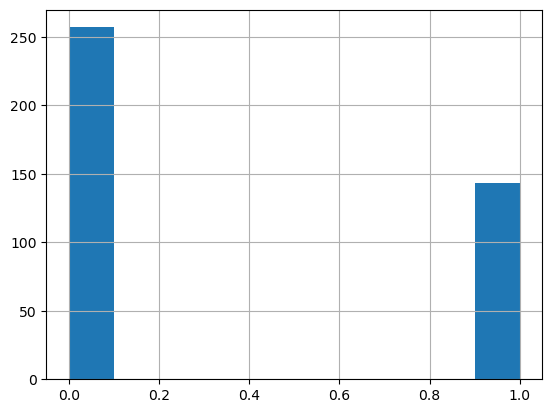

In [3]:
# checking the distribution of output variable
data['Purchased'].hist()

### Finding the dependant and independant features using correlation matrix
- As naive bayes works better with independant features we will try to find dependant feature and eliminate them.
- can directly use data.corr() method to check the correlation but to better visualize it we are using sns heatmap.

<AxesSubplot:>

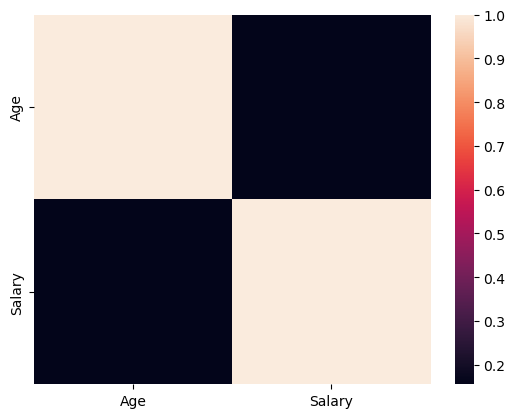

In [4]:
corr_data = data.iloc[:, : -1].corr(method="pearson")
sns.heatmap(corr_data)

Darker area shows more covariance means it is independant to each other.
If any features are dependant then don't consider them for model fitting.

In [5]:
print(corr_data.corr())

        Age  Salary
Age     1.0    -1.0
Salary -1.0     1.0


### Visualizing the distribution of each feature

<AxesSubplot:xlabel='Salary', ylabel='Count'>

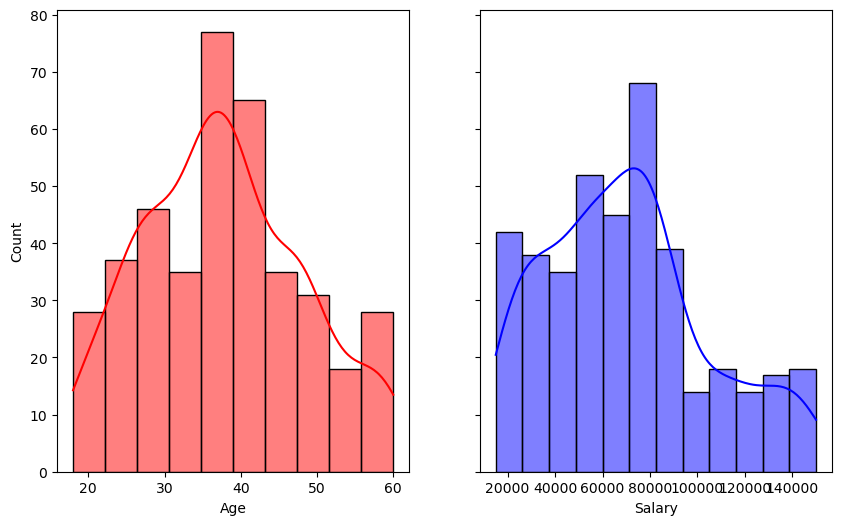

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True) 
# This below figure has 1 row, 2 column 
sns.histplot(data, ax=axes[0], x="Age",kde=True, color="r")
sns.histplot(data, ax=axes[1], x="Salary",kde=True, color="b")

In [7]:
x = data[['Age', 'Salary']]
x

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y = data[['Purchased']]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [9]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=10)

In [39]:
print(f'lenght of x_train: {len(x_train)}')
print(f'lenght of x_test: {len(x_test)}')
print(f'lenght of y_train: {len(y_train)}')
print(f'lenght of y_test: {len(y_test)}')

lenght of x_train: 320
lenght of x_test: 80
lenght of y_train: 320
lenght of y_test: 80


In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [33]:
model.fit(x_train, y_train)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
accuracy = accuracy_score(y_test, y_pred=y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9125


In [36]:
report = classification_report(y_test, y_pred)
print(f'Classification report: \n {report}')

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



In [37]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f'confusion matrix: \n {conf_mat}')

confusion matrix: 
 [[48  4]
 [ 3 25]]


Text(0.5, 1.0, 'confusion matrix')

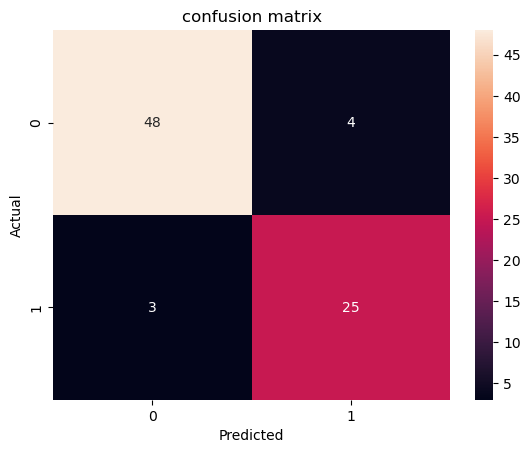

In [41]:
# visualizing confusion matrix
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("confusion matrix")

### Roc curve

In [46]:
y_score = model.predict_proba(x_test)[:, -1]
y_score

array([0.33711449, 0.17885133, 0.52465735, 0.54625167, 0.013987  ,
       0.94955346, 0.19256177, 0.54756152, 0.10700251, 0.24229283,
       0.27493362, 0.22789178, 0.99831516, 0.93295979, 0.56078151,
       0.20861393, 0.06796358, 0.01745385, 0.06848107, 0.80284464,
       0.02713603, 0.01420833, 0.19496501, 0.97740189, 0.93491206,
       0.14314823, 0.17420816, 0.95740257, 0.61952041, 0.12708499,
       0.13506465, 0.05200155, 0.07164904, 0.68619364, 0.95368458,
       0.08471136, 0.69785326, 0.96454518, 0.22320425, 0.03353728,
       0.25947845, 0.44160739, 0.02349996, 0.04332634, 0.13271851,
       0.07941568, 0.98552361, 0.19256177, 0.2204428 , 0.01914261,
       0.37328903, 0.75778217, 0.54785644, 0.13612115, 0.30420014,
       0.2043935 , 0.7937033 , 0.04005942, 0.78787621, 0.99947418,
       0.04249366, 0.83559953, 0.16450689, 0.94864142, 0.99490575,
       0.57326253, 0.33711449, 0.99734275, 0.01156216, 0.25497748,
       0.18255682, 0.44618299, 0.03237241, 0.03353728, 0.06900

In [50]:
from sklearn.metrics import roc_curve, auc

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)

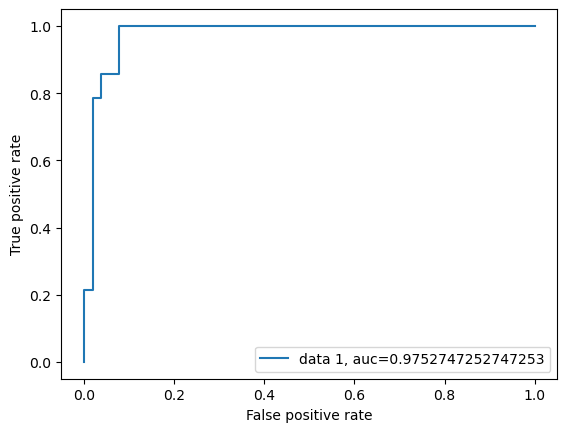

In [68]:
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()


In [65]:
# Finding the threshold value
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]
print(f'Optimal Threshold is: {optimal_threshold}')

Optimal Threshold is: 0.3732890257740435


In [71]:
# Finding which threshold gives best accuracy score
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(y_score>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
9,0.337114,0.9500
8,0.373289,0.9375
5,0.573263,0.9125
6,0.547856,0.9125
7,0.546252,0.9125
4,0.578808,0.9000
10,0.194965,0.7875
11,0.192562,0.7750
3,0.972676,0.7250
2,0.977402,0.7125
